# KD tree
- k 차원 공간의 점들을 구조화하는 공간 분할 자료구조

In [2]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('C:/Users/sonso/Desktop/Git/Study/ML/손학영/data/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

## 데이터 전처리

In [24]:
li_col

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [25]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [27]:
df.shape

(214, 10)

In [4]:
# 이상치 제거 

# 이상치 확인 
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import seaborn as sns 


li_col = df.columns[:-1]
fig, ax = plt.subplots(1,9, figsize = (30,6))
count = 0
for col in li_col : 
    sns.boxenplot(data = df[col], ax = ax[count])
    ax[count].set_title(col)
    count +=1 
plt.show()

<Figure size 3000x600 with 9 Axes>

In [5]:
li_col = li_col.drop('Ba')

In [6]:
# 이상치 제거 
def get_outlier(df, col) : 
    Q25= np.percentile(df[col].values, 25)
    Q75= np.percentile(df[col].values, 75)
    
    IQR = Q75-Q25 
    
    lowest = Q25 - 1.5*IQR
    highest = Q75 + 1.5*IQR 
    
    outlier_idx = df[col][(df[col] < lowest) | (df[col] > highest)].index 
    
    return outlier_idx 

for col in li_col : 
    outlier_idx = get_outlier(df, col)
    df.drop(outlier_idx, axis = 0, inplace= True)

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,1.517329,13.095135,3.499279,1.381712,72.816577,0.585676,8.405586,0.005405,0.049730,1.666667
std,0.001012,0.352732,0.233085,0.184848,0.372223,0.067145,0.348213,0.023424,0.080965,0.651339
min,1.515670,12.160000,2.710000,1.050000,71.810000,0.370000,7.780000,0.000000,0.000000,1.000000
25%,1.516490,12.850000,3.450000,1.250000,72.640000,0.560000,8.105000,0.000000,0.000000,1.000000
50%,1.517470,13.090000,3.530000,1.350000,72.870000,0.580000,8.410000,0.000000,0.000000,2.000000
75%,1.517945,13.335000,3.600000,1.520000,73.075000,0.625000,8.620000,0.000000,0.100000,2.000000
max,1.521770,14.040000,3.980000,1.900000,73.700000,0.730000,9.230000,0.140000,0.260000,3.000000


In [8]:
# 정규화 중 하나 minmax scaler 
# (x-min(x)) / (max(x) - min(x))

for col in li_col : 
    df[col] = (df[col] - min(df[col])) / (max(df[col]) - min(df[col]))

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,0.318033,0.920213,0.700787,0.364706,0.486772,0.305556,0.034483,0.0,0.0,1
2,0.083607,0.728723,0.661417,0.576471,0.624339,0.055556,0.000000,0.0,0.0,1
3,0.326230,0.558511,0.771654,0.282353,0.423280,0.555556,0.303448,0.0,0.0,1
4,0.286885,0.590426,0.716535,0.223529,0.671958,0.500000,0.200000,0.0,0.0,1
5,0.047541,0.335106,0.708661,0.670588,0.613757,0.750000,0.200000,0.0,1.0,1


# KNN

> 거리 계산 
- L2 distance : 유클리디안거리 
- L1 distance :  맨해튼 거리 (차이 절대값의 합 )

> k 값 
- k의 개수가 짝수이면 안된다. 하지만, 그렇다고 무조건 홀수로 정해야 하는 것은 아니다. 
- k =3 이라고 했는데, 분류값이 3개이면 결정을 못내릴 수도 있다. 
- k 측정 거리가 너무 커지면 데이터 주변의 지역분포에 민감하다 
- `항목이 빈번한 데이터`가 예측을 지배한다.

> 데이터 조건 
- 정규화 필요 
- 이상치 제거 
- 결측치 제거 

> 장점 
- 단순, 성능이 좋음, 훈련단계가 빠름 

> 단점 
- 모델 생성이 없기 때문에 특징과 클래스 간의 관계 이해가 제한적이다. 
- 데이터셋의 특징이 많으면 분류가 느리다
- missing value가 있으면 작동 잘 안한다
- 관련없는 애들도 들어갈 수 있음 

In [9]:
from sklearn.model_selection import train_test_split

x = df.drop('Type', axis =1)
y = df['Type']


x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2, random_state=20)

In [10]:
#사이킷런에서 knn라이브러리를 불러온다.
from sklearn.neighbors import KNeighborsClassifier

#부르기 쉽게 kn으로 줄여준다.
kn = KNeighborsClassifier()

#훈련데이터를 fitting 시켜준다. 
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
kn.score(x_train,y_train)

0.8636363636363636

In [12]:
kn.score(x_test,y_test)

0.5652173913043478

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_neighbors' : range(3,10), 'weights' : ['uniform', 'distance'], 'p' : [1,2]}] # k개에게 독같은 가중치를 주는 것(다수결) / 거리 가중치 투표  # 1 = 맨하튼거리, 2 = 유클리디안

gs = GridSearchCV(estimator=kn, param_grid= param_grid, cv=5, n_jobs=1)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid=[{'n_neighbors': range(3, 10), 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
print(gs.best_params_)
print(gs.best_score_)

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.8183006535947712


In [37]:
model = gs.best_estimator_
model.score(x_test, y_test)

0.6086956521739131

# k-nn 회귀 
- 영화등급 같은 걸 예측할 때 사용

# Radius Neighbors Classifier 
새로운 예제의 반경에 있는 모든 예제를 사용하여 예측을 수행하는 k-nn의 확장 알고리즘 

> 장점 
특징 공간에서 멀리 떨어진 데이터(`이상치`)가 예측에 기여하는 것을 방지한다

In [29]:
from sklearn.neighbors import RadiusNeighborsClassifier

# create the model
rnc = RadiusNeighborsClassifier()

param_grid = [{'radius' : np.arange(1,2,0.2), 'weights' : ['uniform', 'distance']}]

gs = GridSearchCV(estimator=rnc, param_grid= param_grid, cv=5, n_jobs=1)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RadiusNeighborsClassifier(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None,
                                                 outlier_label=None, p=2,
                                                 radius=1.0,
                                                 weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid=[{'radius': array([1. , 1.2, 1.4, 1.6, 1.8]),
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
print(gs.best_params_)
print(gs.best_score_)

{'radius': 1.2, 'weights': 'distance'}
0.7150326797385621


In [31]:
model = gs.best_estimator_
model.score(x_test, y_test)

0.6086956521739131

# NCA 
주변 구성 요소를 활용한 차원 축소 

> PCA 
- 데이터의 분산을 가장 잘 설명하는 속성 조합을 식별함 

> LDA 
- 클래스 간 차이가 가장 큰 속성을 식별함 
- PCA와 달리 `지도학습`임 

> NCA 
- 확률적 knn이 최상의 정확도를 제공할 수 있는 feature space 을 찾는 것 
- `지도학습`임 

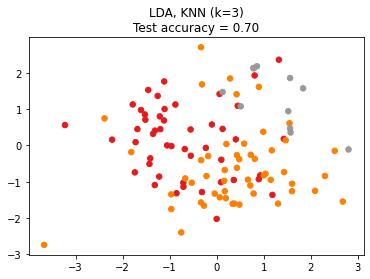

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 3
random_state = 0


knn = KNeighborsClassifier()


lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# 가장 가까운 이웃 분류기를 사용하여 방법을 평가합니다.
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# 비교할 방법 목록 작성
dim_reduction_methods = [('LDA', lda)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # 방법의 모델 맞추기
    model.fit(x_train, y_train)

    # 포함 된 훈련 세트에 가장 가까운 이웃 분류기 맞추기
    knn.fit(model.transform(x_train), y_train)

    # 임베디드 테스트 세트에서 가장 가까운 이웃 정확도 계산
    acc_knn = knn.score(model.transform(x_test), y_test)

    # 피팅 된 모델을 사용하여 2 차원으로 데이터 세트 포함
    X_embedded = model.transform(x)

    # 예상 점수를 플로팅하고 평가 점수를 보여줍니다.
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))

In [42]:
param_grid = [{'n_neighbors' : range(3,10), 'weights' : ['uniform', 'distance'], 'p' : [1,2]}]

gs = GridSearchCV(estimator=knn, param_grid= param_grid, cv=5, n_jobs=1)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid=[{'n_neighbors': range(3, 10), 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
gs.best_score_

0.8183006535947712

In [45]:
gs.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [46]:
model = gs.best_estimator_
model.score(x_test, y_test)

0.6086956521739131

### study에서 알게 된것 
- F1 score 하기 
- gca() plt . 왜곡도 표현하는 함수 
- model kernel : svm에서 파라미터 
